In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Research on the Transaction Prices of Used Cars in India: Influencing Factors and Price Predictions.**

Words:1997

Time:34s

## 1 Introduction
Since the early 1990s, urbanization in India has been accelerating, leading to a significant increase in urban residents' demand for transportation (Jaysawal and Saha, 2014). The used car market, in particular, has seen a notable rise in demand (Menon, 2012). This report investigates the principal factors that influence used car prices within the Indian context. Also, develop predictive models through machine learning to understand these pricing dynamics better.

## 2 Literature review

A used car is a vehicle that has been owned and used by one or more people (Berkovec, 1985). The used car market has expanded significantly worldwide, with increased car ownership and the high costs and limited supply of new vehicles. In particular, the Indian used car market has experienced notable growth recently, driven by economic shifts, changing consumer preferences, and technological advancements (Shende, 2014). Despite this expansion, the market faces several challenges, including a lack of stringent regulations, which leads to frequent occurrences of fraud, undermining trust and transparency between buyers and sellers (India Used Car Market Latest Report [2024-2030] Demand, Sales, Growth). This situation highlights the need for a predictive model to accurately estimate used car prices, aiding both sellers in setting appropriate prices and buyers in making informed purchases, ultimately fostering a fairer and more transparent market.

Ackerman's (1973) study, utilizing data from 1956 to 1965 provided by the National Automobile Dealers Association, established that car depreciation is closely linked to age. Train and Winston (2007) expanded on this understanding by showing that a car’s horsepower and transmission type significantly influence buyer preferences. Menon (2012) explored how consumers initially gather information about car models and brands, primarily through TV commercials, manufacturer websites, and dealership visits, highlighting the impact of the seller type on consumer decisions. Further, research by Busse, Knittel, and Zettelmeyer (2013) identified fuel economy, mileage, and the availability and cost of spare parts as key factors for buyers, demonstrating these variables’ statistical significance in influencing purchasing decisions.

Linear regression is widely recognized as a simply and effective method to identify influencing factors for numerical target data, as outlined by Weisberg (2005). This approach is particularly useful in predicting prices for both new and used cars, offering clear insights into variable relationships. Moreover, more sophisticated models like random forests have gained popularity in vehicle price prediction due to their robustness in managing non-linear relationships and complex interactions between multiple variables, as demonstrated by Asghar et al. (2021). Furthermore, Ganesh and Venkatasubbu (2019) support the widespread use of these supervised learning methods—linear regression and random forests—in car price prediction. This convergence of findings across studies confirms that the application of these models is well-established and effective for analyzing used cars price.


## 3 Research question


This report aims to answer：

RQ1: "Which factors have the most significant impact on the price of a used car? "

RQ2:"Is it possible to predict the price of these used cars from 2010 to 2020 in India?"


## 4 Presentation of data

The data was obtained from CarDekho.com, a leading automotive sales and information platform in India. This website offers extensive details on used cars, including specifications and pricing, and aggregates listings from dealers and individual sellers across the country.

### 4.1 Data Input

A summary of the packages utilized for the analysis.

In [ ]:
# Start time
import time
start_time = time.time()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot


In [ ]:
# Read dataset
cars = pd.read_csv('/content/drive/MyDrive/DS data/cars.csv')
# url = https://github.com/Goxny-xy/DSSS/blob/main/cars.csv
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4339 non-null   object
 1   year           4339 non-null   int64 
 2   selling_price  4339 non-null   int64 
 3   km_driven      4339 non-null   int64 
 4   fuel           4339 non-null   object
 5   seller_type    4339 non-null   object
 6   transmission   4339 non-null   object
 7   owner          4339 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.3+ KB


In [ ]:
# Dataset shape
cars.shape

(4339, 8)

There are 4,339 respondents in this dataset, and 8 variables contain two data types: categorical (aka object) and numerical (int64). Each row represents a record of a used car with respect to year, selling price, mileage, fuel type, seller type, transmission, and owner, covering the period from 1995 to 2020 in India.


| Varable            | Type       | Description                                                                     |
|--------------------|------------|---------------------------------------------------------------------------------|
| name            | Categorical variable |The name of the car.                        |
| year              | Numerical variable |The year in which the car was bought.       |
| selling_price           |Numerical variable  |The price（₹） the owner wants to sell the car at. |
| km_driven       |Numerical variable  | The distance completed by the car in km. |
| fuel     | Categorical variable  | Fuel type of the car i.e Diesel, Petrol, CNG(Compressed Natural Gas), LPG(LiquefiedPetroleumGas).                             |
| seller_type	             | Categorical variable |Defines whether the seller is a dealer or an individual.   |
| transmission | Categorical variable  |Defines whether the car is manual or automatic.                              |
| owner       | Categorical variable| Defines the number of owners the car has previously had.

In [ ]:
# Quick view
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


### 4.2 Data Pre-processing

Before beginning the analysis, it's crucial to first check for NA (missing) values to avoid errors.

Then, we will limit the scope to examining data from the ten years leading up to 2024. This timeframe ensures that the gap between the current and historical selling prices of cars is moderate, allowing for more relevant analysis.

In [ ]:
# Check NA values
cars_na = cars.dropna()
cars_na.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# Drop the year < 2010
cars1 = cars_na[cars['year'] >= 2010]

In [ ]:
# Drop 'name' column as it is not independent variable
cars1 = cars1.drop(labels='name',axis= 1)

In [ ]:
# Convert categorical variables
cars2 = pd.get_dummies(cars1, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
cars2 = cars2.astype(int)
# Double check the result
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3526 entries, 2 to 4338
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   year                          3526 non-null   int64
 1   selling_price                 3526 non-null   int64
 2   km_driven                     3526 non-null   int64
 3   fuel_Diesel                   3526 non-null   int64
 4   fuel_LPG                      3526 non-null   int64
 5   fuel_Petrol                   3526 non-null   int64
 6   seller_type_Individual        3526 non-null   int64
 7   seller_type_Trustmark Dealer  3526 non-null   int64
 8   transmission_Manual           3526 non-null   int64
 9   owner_Fourth & Above Owner    3526 non-null   int64
 10  owner_Second Owner            3526 non-null   int64
 11  owner_Test Drive Car          3526 non-null   int64
 12  owner_Third Owner             3526 non-null   int64
dtypes: int64(13)
memory usage: 385.7 KB


In [ ]:
# Quick view
cars2.head(10)

,year,selling_price,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2,2012,600000,100000,1,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,0,1,0,1,0,1,0,0
6,2016,550000,25000,0,0,1,1,0,1,0,0,0,0
7,2014,240000,60000,0,0,1,1,0,1,0,1,0,0
8,2015,850000,25000,0,0,1,1,0,1,0,0,0,0
9,2017,365000,78000,0,0,0,1,0,1,0,0,0,0
10,2015,260000,35000,0,0,1,1,0,1,0,0,0,0
11,2014,250000,100000,0,0,1,1,0,1,0,0,0,0
12,2018,1650000,25000,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Current shape
cars2.shape

(3526, 13)

### 4.3 Descriptive statistics

After cleaning the dataset, there are 3,526 records of used cars. We will compute the attributes of interest using the provided code.
Analysing the descriptive statistics generated from this data will help us better understand these values.


In [ ]:
# Check descriptive statistics
cars1['year'].value_counts()

year
2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2020     48
Name: count, dtype: int64

In [ ]:
cars1['fuel'].value_counts()

fuel
Diesel    1923
Petrol    1553
CNG         36
LPG         14
Name: count, dtype: int64

In [ ]:
cars1['seller_type'].value_counts()

seller_type
Individual          2517
Dealer               907
Trustmark Dealer     102
Name: count, dtype: int64

In [ ]:
cars1['transmission'].value_counts()

transmission
Manual       3120
Automatic     406
Name: count, dtype: int64

In [ ]:
cars1['owner'].value_counts()

owner
First Owner             2553
Second Owner             771
Third Owner              156
Fourth & Above Owner      29
Test Drive Car            17
Name: count, dtype: int64

In [ ]:
# Check numeric columns
print(cars1.describe(include = [np.number]))

              year  selling_price      km_driven
count  3526.000000   3.526000e+03    3526.000000
mean   2014.650879   5.823559e+05   60820.960011
std       2.675724   6.118256e+05   43453.501014
min    2010.000000   3.500000e+04       1.000000
25%    2012.000000   2.750000e+05   30000.000000
50%    2015.000000   4.349990e+05   52600.000000
75%    2017.000000   6.600000e+05   80000.000000
max    2020.000000   8.900000e+06  560000.000000


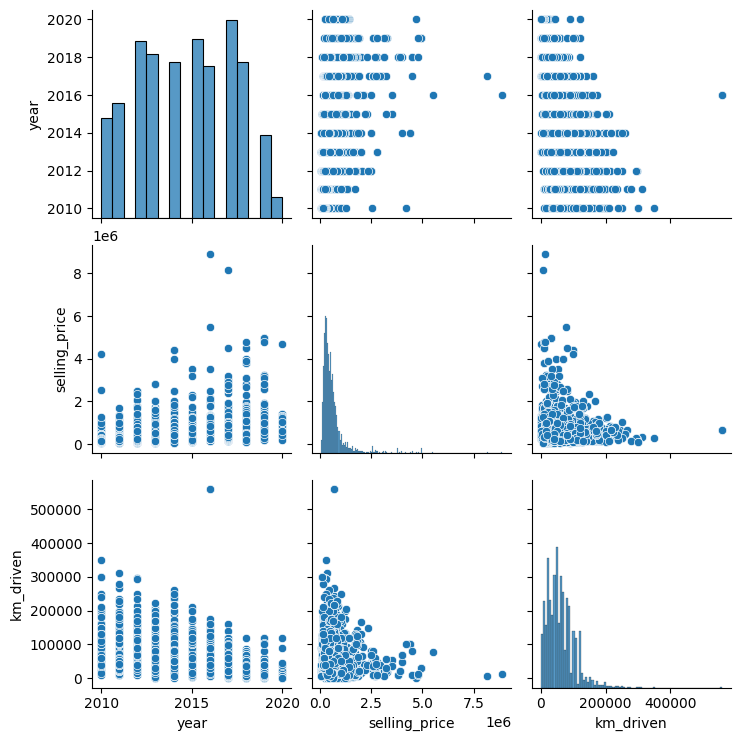

In [ ]:
sns.pairplot(cars1)

Since vehicle prices can vary widely due to brand pricing, when showing the relationship between price and each variable below, we will use the median price, which is insensitive to extremes and gives a truer picture of most purchases.

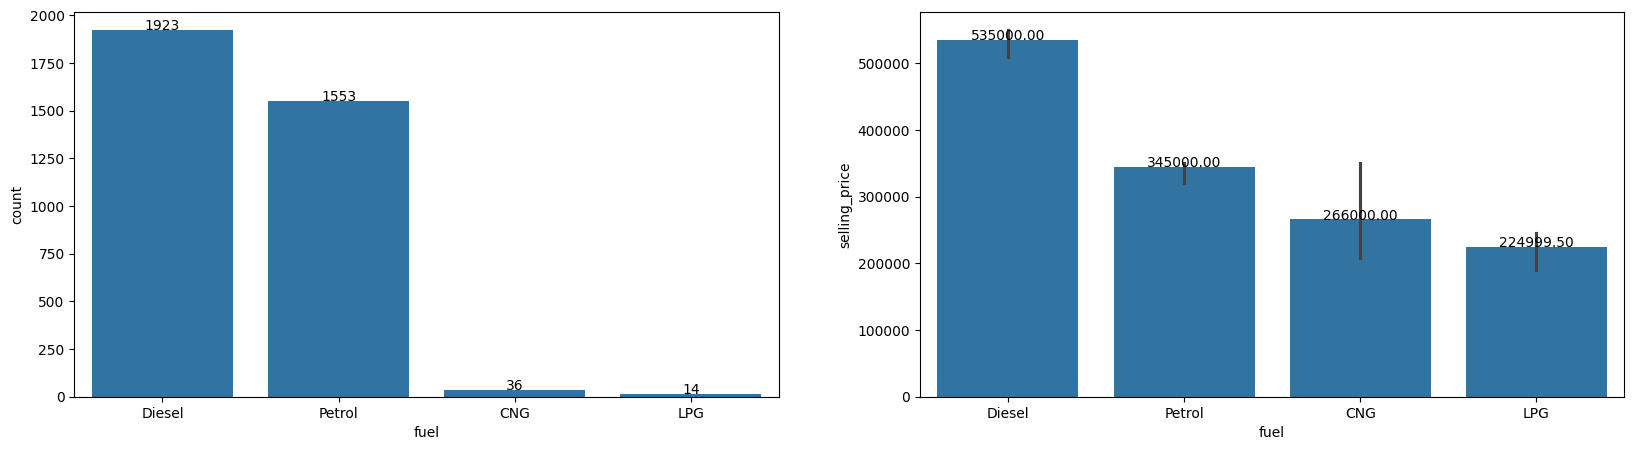

In [ ]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
# Count
sns.countplot(x="fuel",data=cars1,ax=axis1)
# Relationship with average price
sns.barplot(x="fuel",y="selling_price",data=cars1,ax=axis2,estimator=np.median)

# Add counting labels
for p in axis1.patches:
    height = p.get_height()
    axis1.text(p.get_x() + p.get_width() / 2., height + 0.1, '%d' % int(height), ha="center")

for p in axis2.patches:
    height = p.get_height()
    axis2.text(p.get_x() + p.get_width() / 2., height + 0.1, '%.2f' % height, ha="center")


**fuel**

The left graph above indicates that diesel and petrol cars dominate the used car market within the dataset. On the right, the data reveals that diesel vehicles command the highest median selling price, at ₹535,000, with petrol vehicles at ₹345,090, CNG at ₹266,000, and LPG at ₹224,995.50. Also, the broader error bars for CNG and LPG indicate a greater variability in their selling prices, possibly reflecting a more variable market or a wider range of vehicle conditions.

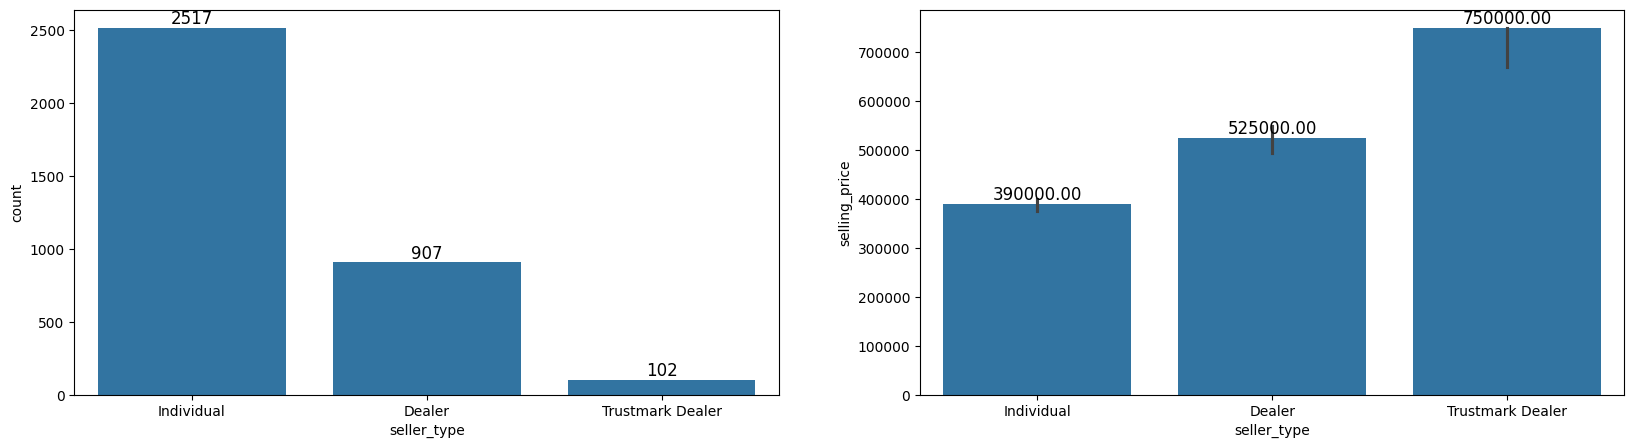

In [ ]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,5))
# Count
sns.countplot(x="seller_type", data= cars1, ax=axis1)
# Relationship with average price
sns.barplot(x="seller_type", y="selling_price",data= cars1, ax=axis2, estimator=np.median )

# Add counting labels
for p in axis1.patches:
    axis1.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
               fontsize=12, ha='center', va='bottom')

for p in axis2.patches:
    axis2.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % p.get_height(),
               fontsize=12, ha='center', va='bottom')


**seller_type**

The graph on the left shows that individual sellers make up the largest number of sellers, with fewer having dealers instead.

Conversely, the right figure illustrates a price trend that is inverse to the composition of sellers.

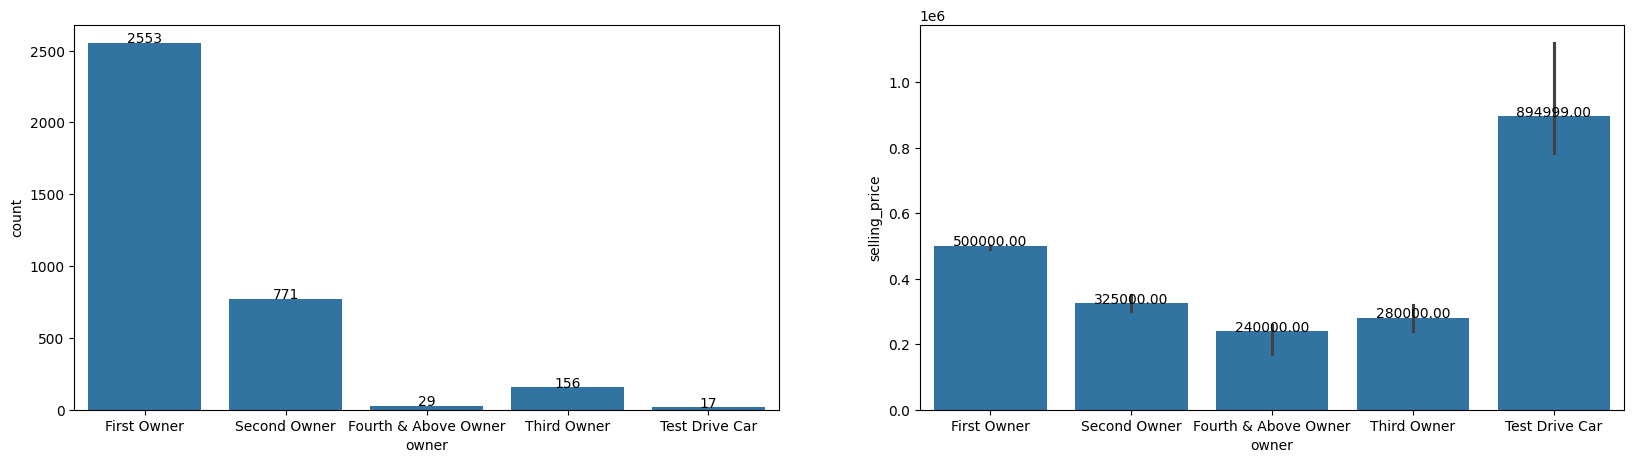

In [ ]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
# Count
sns.countplot(x="owner",data=cars1,ax=axis1)
# Relationship with average price
sns.barplot(x="owner",y="selling_price",data=cars1,ax=axis2,estimator=np.median)

# Add counting labels
for p in axis1.patches:
    height = p.get_height()  # Count
    axis1.text(p.get_x() + p.get_width() / 2., height + 0.1, '%d' % int(height), ha="center")

for p in axis2.patches:
    height = p.get_height()  # Price
    axis2.text(p.get_x() + p.get_width() / 2., height + 0.1, '%.2f' % height, ha="center")



**owner**

The left bar chart displays the distribution of vehicle counts based on ownership. 'First Owner' vehicles are the most prevalent, with quantities decreasing as the number of previous owners increases; 'Test Drive Cars' are the least common.

The right chart reveals that 'First Owner' cars achieve the highest selling prices, which decrease as ownership transitions. However, 'Test Drive Cars' fetch higher prices than might be expected, likely because they are newer or higher-end models.


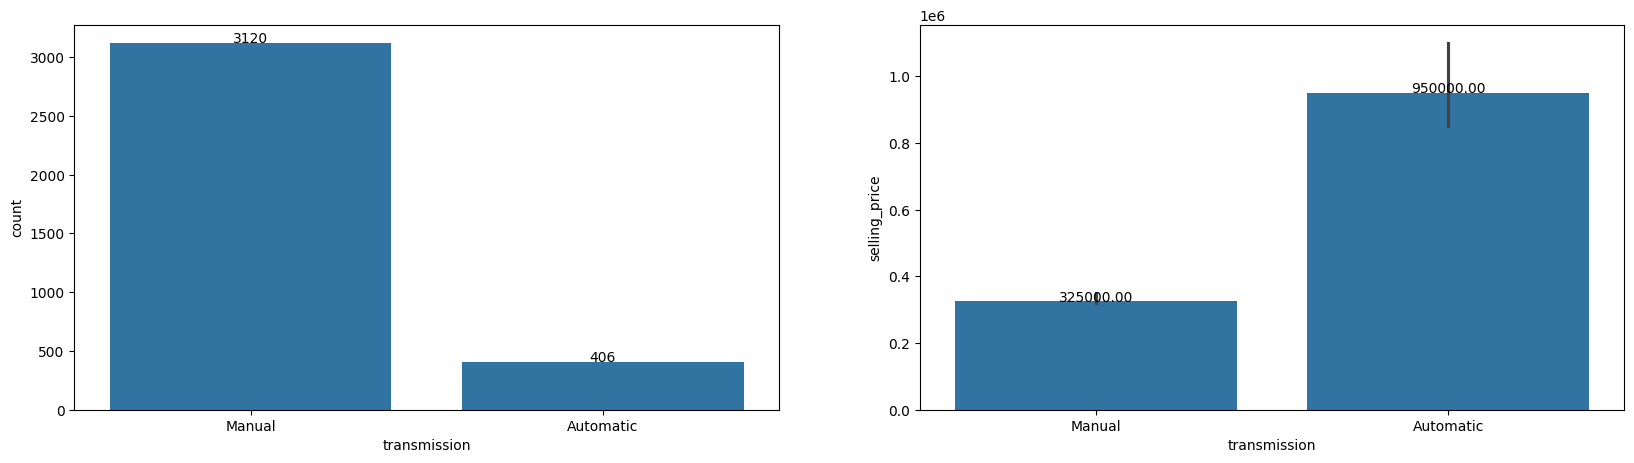

In [ ]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
# Count
sns.countplot(x="transmission",data=cars1,ax=axis1)
# Relationship with median price
sns.barplot(x="transmission",y="selling_price",data=cars,ax=axis2,estimator=np.median)

# Add counting labels
for p in axis1.patches:
    height = p.get_height()
    axis1.text(p.get_x() + p.get_width() / 2., height + 0.1, '%d' % int(height), ha="center")


for p in axis2.patches:
    height = p.get_height()
    axis2.text(p.get_x() + p.get_width() / 2., height + 0.1, '%.2f' % height, ha="center")

**transmission**

The left bar chart illustrates the distribution of vehicles by transmission type. Manual transmission vehicles, totaling 3,120, are significantly more prevalent than those with automatic transmissions, which number only 406.

On the right, the chart compares the median selling prices of vehicles based on their transmission type. Vehicles with automatic transmissions have a considerably higher median selling price, at ₹1,408,154.00, compared to those with manual transmissions, which sell for a median price of ₹400,066.69.

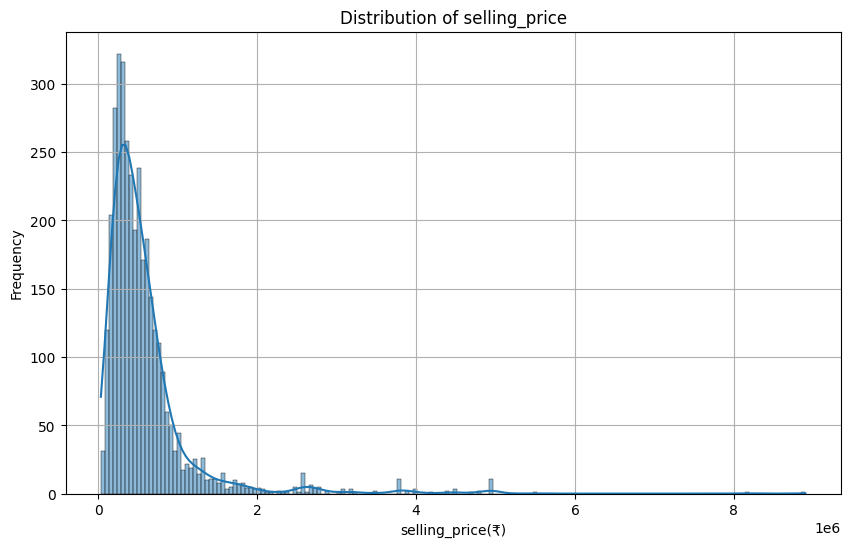

In [ ]:
# Plotting the distribution of the price
plt.figure(figsize=(10, 6))
sns.histplot(cars1['selling_price'], kde=True)
plt.title('Distribution of selling_price')
plt.xlabel('selling_price(₹)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**selling_price**

The distribution of selling prices for used cars, as shown above, is right-skewed. The minimum selling price recorded is ₹35,000, while the maximum reaches up to ₹8,900,000. The mean selling price across the dataset is ₹582,355.9.

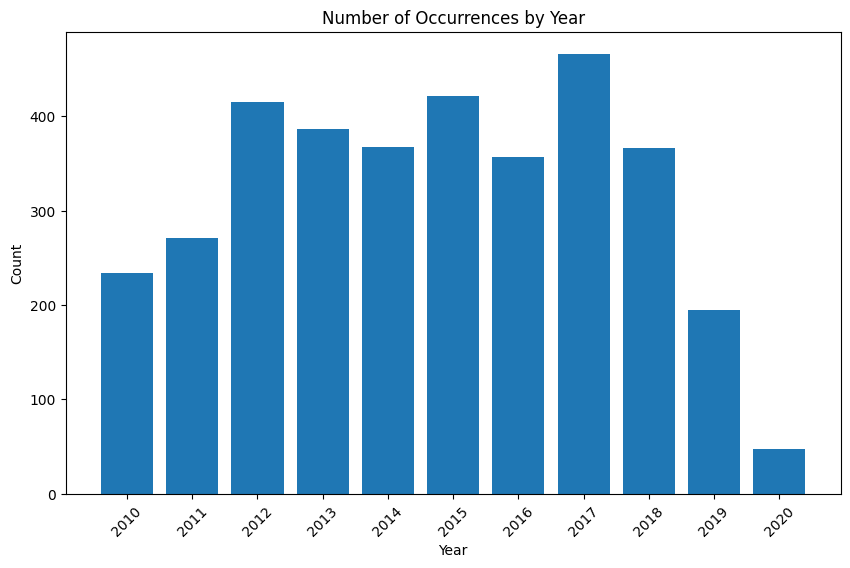

In [ ]:
# Count of year
year_counts = cars1['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))  # 设置图形的大小
plt.bar(year_counts.index.astype(str), year_counts.values)  # 创建条形图
plt.xlabel('Year')  # 设置x轴标签
plt.ylabel('Count')  # 设置y轴标签
plt.title('Number of Occurrences by Year')  # 设置图形标题
plt.xticks(rotation=45)  # 旋转x轴标签，提高可读性
plt.show()

**year**

The bar chart displays the trend in used car sales over the years, showing a steady increase until reaching a peak in 2016, followed by a subsequent decline. Notably, there is a sharp drop in sales in 2019 and 2020, which may suggest the influence of market dynamics or external global events, such as the COVID-19 pandemic.

<Axes: xlabel='Age', ylabel='selling_price'>

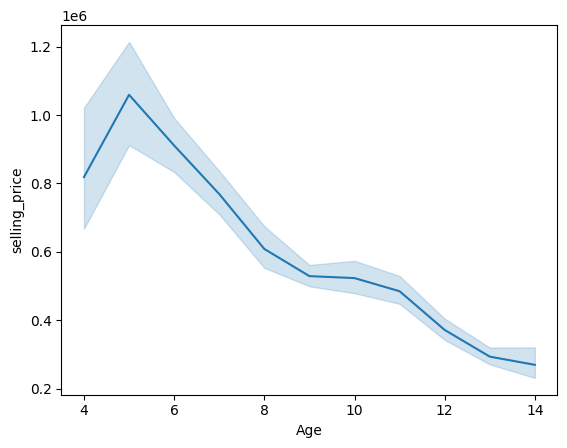

In [ ]:
# Age vs Price
cars1["Age"] = 2024-cars1["year"]
sns.lineplot(data=cars1,x="Age",y="selling_price")

**age**


The line graph shows that, typically, as vehicles age, they sell for less. There's an interesting increase in value around the 6-year mark before the downward trend resumes. The shaded area suggests there's some variation in prices, likely due to other factors in the dataset.

<Axes: xlabel='seller_type,owner,transmission'>

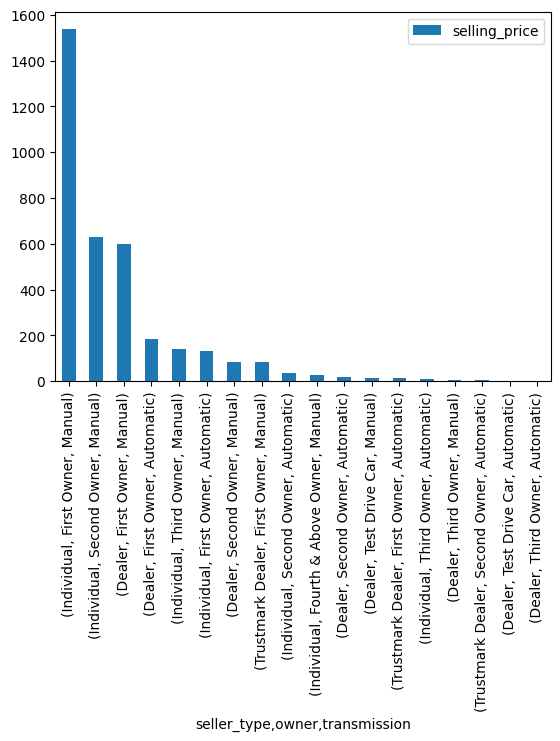

In [ ]:
df_seller_owner = cars1.groupby(by=["seller_type","owner","transmission"])
df_seller_owner.count().sort_values(by="selling_price", ascending=False).plot(kind="bar", y="selling_price")

The figure above gives us an idea of how "seller_type", "owner" and "transmission" as a group affect the "selling_price".

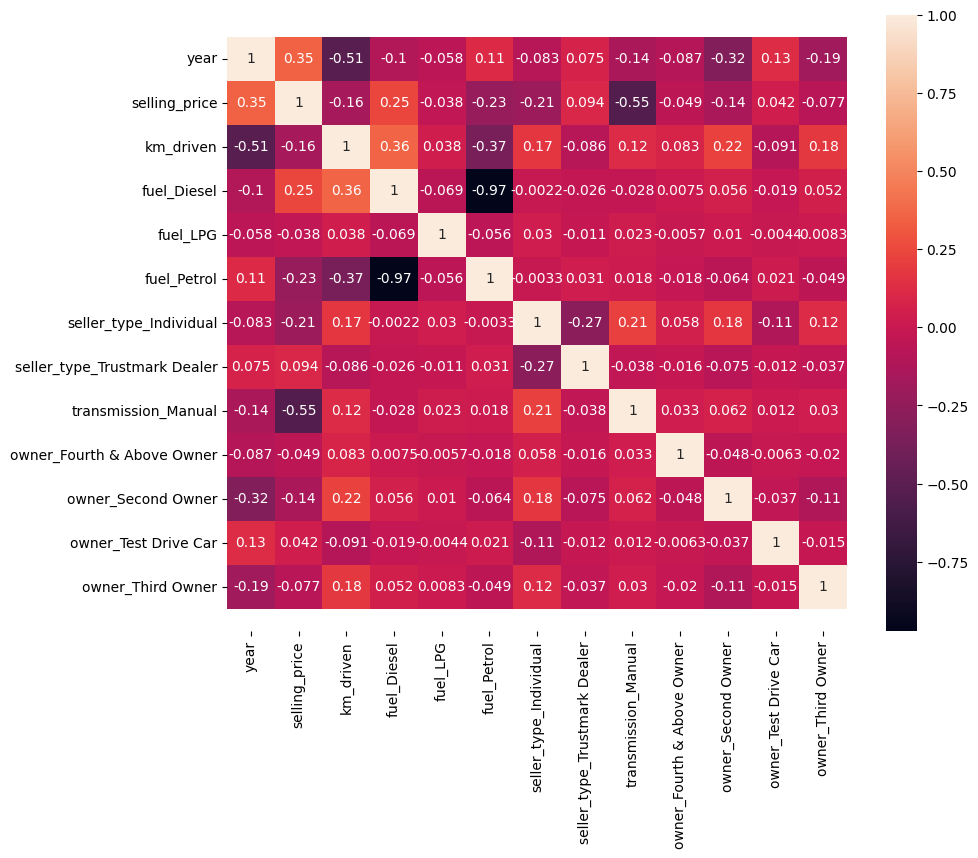

In [ ]:
# Heatmap to show the correlation between all variables of the dataset
plt.figure(figsize=(10, 8))
cor = cars2.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**Correlation**

The result indicated that 'year', 'km_driven' and 'owner_Second Owner' display strong correlation with the 'selling_price'. Also notice us to check multicollinearity.

## 5 Methodology

Given the study's goal to analyze price-influencing factors and make accurate price predictions, employing linear regression and random forests within supervised learning frameworks is considered appropriate.

Supervised learning methods build models using existing training data to predict or classify unseen data. Since they utilize labeled training data, they can achieve relatively accurate prediction outcomes (Caruana and Niculescu-Mizil, 2006).


In [ ]:
X = cars2.drop(['selling_price'], axis = 1)
Y = cars2['selling_price']

### 5.1 Linear Regression

#### 5.1.1 Multicollinearity

Before building linear regression model, multicollinearity is a significant issue. We can utilize the Variance Inflation Factor (VIF) to measure the
degree of multicollinearity between each of the independent variables.

In [ ]:
# VIF Checking
# VIF calculation requires the inclusion of a constant term in the model
transformed_data_with_constant = cars2.copy()
transformed_data_with_constant['constant'] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = transformed_data_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(transformed_data_with_constant.values, i) for i in range(transformed_data_with_constant.shape[1])]

# Removing the entry for the constant as it's not an original variable
vif_data = vif_data[vif_data['Variable'] != 'constant']

# Display the VIF values
vif_data.sort_values(by='VIF', ascending=False)

,Variable,VIF
3,fuel_Diesel,25.026714
5,fuel_Petrol,24.902725
1,selling_price,1.822953
0,year,1.679806
2,km_driven,1.625962
8,transmission_Manual,1.495839
4,fuel_LPG,1.389859
6,seller_type_Individual,1.227296
10,owner_Second Owner,1.219237
12,owner_Third Owner,1.112392


#### 5.1.2 OLS

The larger VIF, the higher multicollinearity (Vatcheva et al., 2016). In this case, we will filter out the variables with a VIF > 5. Then we will use the rest of variables to build the model.

In [ ]:
X2 = X.drop(['fuel_Diesel'], axis = 1)
X3 = X2.drop(['fuel_Petrol'], axis = 1)
Y = cars2['selling_price']
# Add constant
X_const = add_constant(X3)

# Build GLM
model = OLS(Y, X_const).fit()

# Summary
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     220.2
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:18:22   Log-Likelihood:                -51126.
No. Observations:                3526   AIC:                         1.023e+05
Df Residuals:                    3515   BIC:                         1.023e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.351e+08   7.56e+06    -17.873      0.000    -1.5e+08    -1.2e+08
year                          6.779e+04   3748.790     18.083      0.000    6.04e+04    7.51e+04
km_driven                        1.0368      0.221      4.697      0.000       0.604       1.470
fuel_LPG                     -8.947e+04   1.29e+05     -0.694      0.488   -3.42e+05    1.63e+05
seller_type_Individual       -1.011e+05   1.97e+04     -5.121      0.000    -1.4e+05   -6.24e+04
seller_type_Trustmark Dealer  1.347e+05   5.04e+04      2.676      0.007     3.6e+04    2.33e+05
transmission_Manual          -9.478e+05   2.62e+04    -36.129      0.000   -9.99e+05   -8.96e+05
owner_Fourth & Above Owner   -6.074e+04   9.07e+04     -0.670      0.503   -2.39e+05    1.17e+05
owner_Second Owner           -2.076e+04   2.16e+04     -0.961      0.336   -6.31e+04    2.16e+04
owner_Test Drive Car          7.851e+04   1.19e+05      0.661      0.509   -1.54e+05    3.11e+05
owner_Third Owner            -3.463e+04   4.15e+04     -0.835      0.404   -1.16e+05    4.67e+04
==============================================================================
Omnibus:                     3095.117   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           221040.654
Skew:                           3.824   Prob(JB):                         0.00
Kurtosis:                      41.027   Cond. No.                     6.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5.1.3 Residuals

To assess the goodness of fit of this model, we will do residual analysis next.

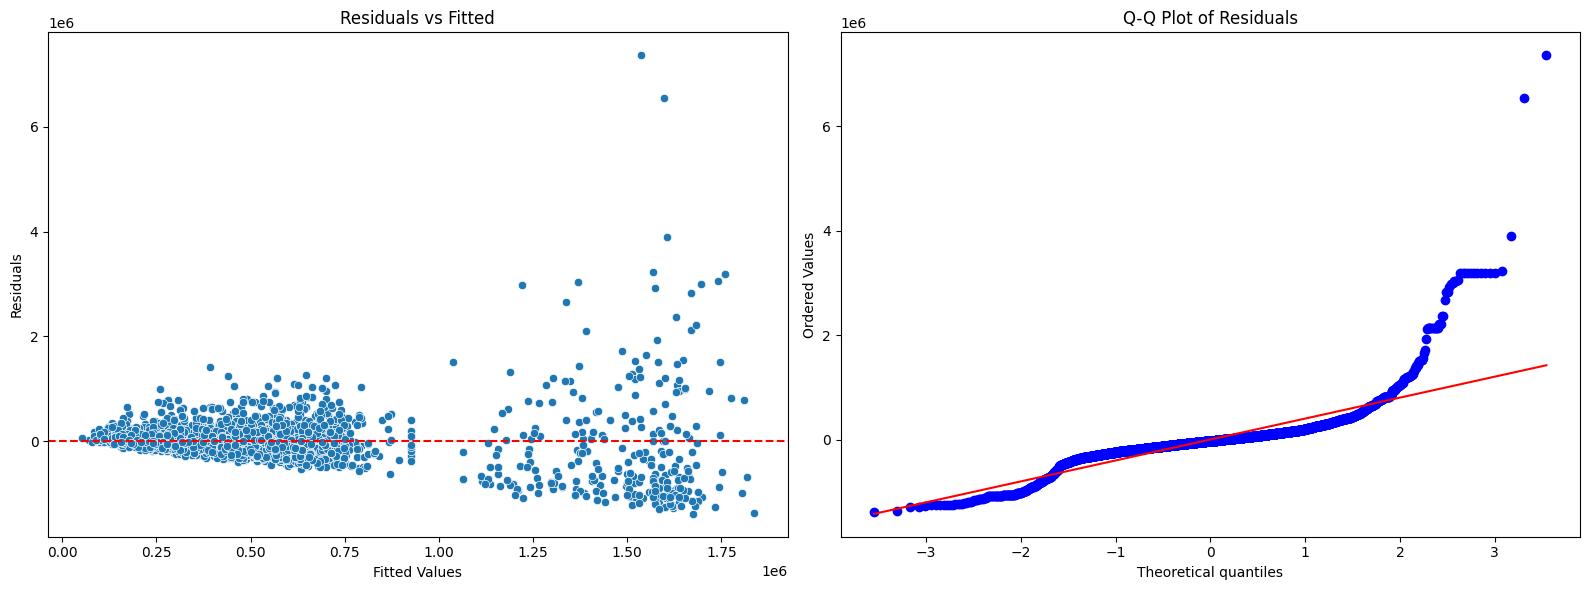

In [ ]:
# Calculate residuals
residuals = model.resid

# Get the fitted values
fitted = model.fittedvalues

# Creating a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

# Residuals vs Fitted values scatter plot
sns.scatterplot(x=fitted, y=residuals, ax=axs[0])
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals vs Fitted')

# QQ plot of residuals
stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

We found that the residual results are not randomly distributed and the Q-Q plot does not lie on the line, so logarithmic transformation is applied to the response variable.



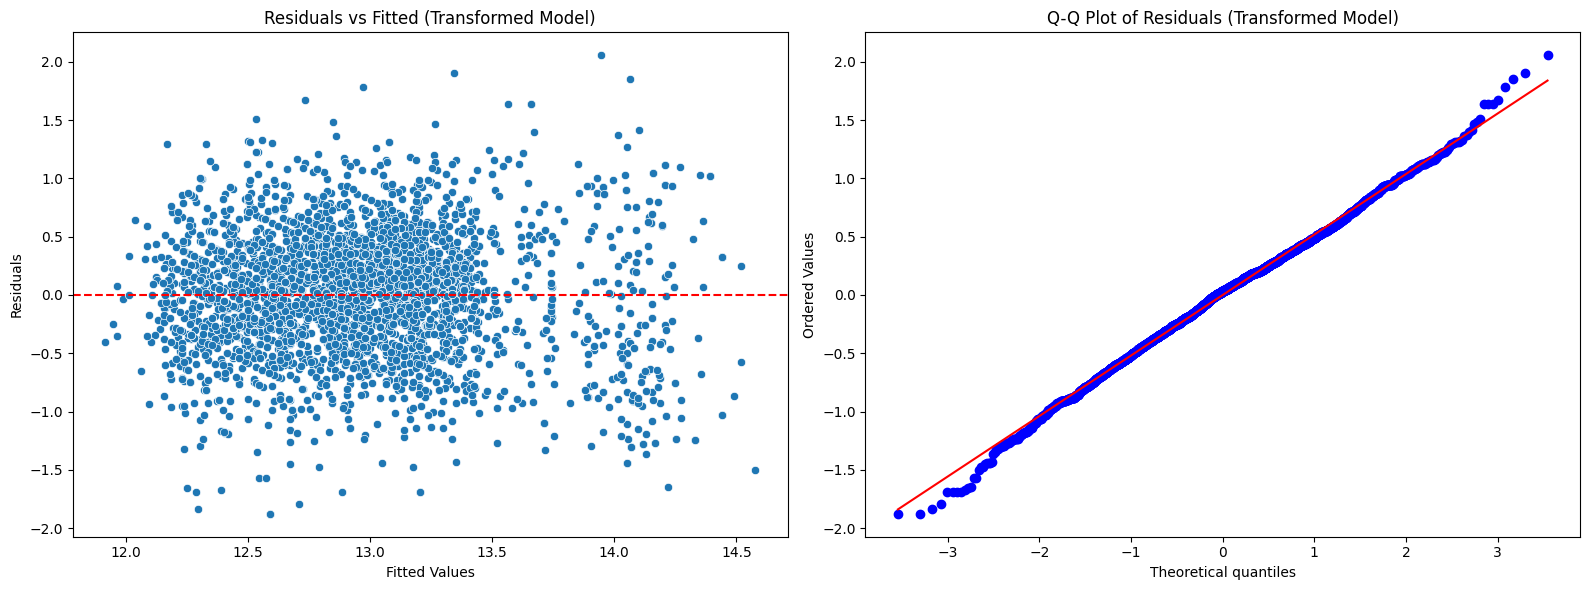

In [ ]:
# Adding a constant term to my predictors
X_const = sm.add_constant(X3)
# Apply log transformation to the response variable, adding a small constant to avoid log(0)
y_transformed = np.log(Y + 0.0001)
#

# Fitting a linear regression model on the transformed response
model_transformed = sm.OLS(y_transformed, X_const).fit()

# Calculate residuals from the transformed model
residuals_transformed = model_transformed.resid

# Get the fitted values
fitted_transformed = model_transformed.fittedvalues

# Creating a figure with two subplots for the transformed model
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

# Residuals vs Fitted values scatter plot for the transformed model
sns.scatterplot(x=fitted_transformed, y=residuals_transformed, ax=axs[0])
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals vs Fitted (Transformed Model)')

# QQ plot of residuals for the transformed model
stats.probplot(residuals_transformed, dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Residuals (Transformed Model)')

plt.tight_layout()
plt.show()


#### 5.1.4 Final mdoel



In [ ]:
# New summary
summary = model_transformed.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     308.4
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:18:23   Log-Likelihood:                -2690.9
No. Observations:                3526   AIC:                             5404.
Df Residuals:                    3515   BIC:                             5472.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Only selecte the variables had p-values less than 0.05.

In [ ]:
# List of variables to include in the new model based on p-value < 0.05
variables_to_include = [
    'year', 'km_driven', 'seller_type_Individual', 'fuel_LPG',
    'seller_type_Trustmark Dealer', 'transmission_Manual',
    'owner_Fourth & Above Owner', 'owner_Third Owner'
]


# Create the features DataFrame with only the selected variables
X = cars2[variables_to_include]
Y = cars2['selling_price']

# The dependent variable transformed
y_transformed1 = np.log(Y + 0.0001)

# Add a constant term to the predictors if not already included
X_with_const = sm.add_constant(X)

# Create the OLS model
model1 = sm.OLS(y_transformed1 , X_with_const)

# Fit the model
results = model1.fit()

# Output the summary of the new model
results_summary = results.summary()
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     384.9
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:04:05   Log-Likelihood:                -2692.4
No. Observations:                3526   AIC:                             5403.
Df Residuals:                    3517   BIC:                             5458.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Final linear regression model is:

log(selling_price)= 0.1377year + 2.412e-06km_driven  -0.2998fuel_LPG -0.1997 seller_type_Individual  + 0.2752seller_type_Trustmark Dealer -0.8385transmission_Manual    -0.2825owner_Fourth & Above Owner     -0.1131owner_Third Owner  -263.6441

### 5.2 Predicition

By default, `train_test_split` will split the data according to a 75:25 split.

The split should be random in order to avoid selection bias. Here, we set random_state=100 to guarantee reproducibility.

In [ ]:
# Train-test data split

x_train,x_test,y_train,y_test = train_test_split(X3,Y,random_state=100)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.
print(x_train.index.identical(y_train.index))
print(x_test.index.identical(y_test.index))

x train:  (2644, 10)
x test:  (882, 10)
y train:  (2644,)
y test:  (882,)
True
True


In [ ]:
x_train.head(10)

,year,km_driven,fuel_LPG,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2225,2018,20000,0,1,0,1,0,0,0,0
1097,2015,30000,0,1,0,1,0,0,0,0
2699,2020,11000,0,1,0,1,0,0,0,0
3929,2012,70000,0,1,0,1,0,1,0,0
81,2014,120000,0,1,0,1,0,1,0,0
3893,2013,100000,0,1,0,1,0,0,0,0
1871,2017,35000,0,1,0,1,0,0,0,0
2130,2017,34000,0,0,0,1,0,0,0,0
1679,2015,100000,0,1,0,1,0,1,0,0
1919,2010,100000,0,1,0,1,0,1,0,0


In [ ]:
x_test.head(10)

,year,km_driven,fuel_LPG,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1575,2020,20000,0,1,0,1,0,0,0,0
1091,2017,44000,0,0,0,1,0,0,0,0
2370,2015,80000,0,1,0,1,0,0,0,0
2824,2018,35000,0,1,0,1,0,0,0,0
777,2016,10000,0,1,0,0,0,0,0,0
926,2016,41000,0,0,0,1,0,0,0,0
1882,2017,15000,0,1,0,1,0,0,0,0
3279,2016,34982,0,0,0,1,0,0,0,0
2650,2012,160000,0,1,0,1,0,1,0,0
954,2015,46957,0,0,0,0,0,0,0,0


In [ ]:
# Prediciton -LR
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)

In [ ]:
# Prediciton -RF
rf_model = RandomForestRegressor(random_state=100)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

In [ ]:
# Evaluations
metrics = {
    'Linear Regression': {
        'R2': r2_score(y_test, lr_predictions),
        'MSE': mean_squared_error(y_test, lr_predictions),
        'MAE': mean_absolute_error(y_test, lr_predictions)
    },
    'Random Forest': {
        'R2': r2_score(y_test, rf_predictions),
        'MSE': mean_squared_error(y_test, rf_predictions),
        'MAE': mean_absolute_error(y_test, rf_predictions),
    }
}
metrics

{'Linear Regression': {'R2': 0.3726870603690178,
  'MSE': 228922793413.1912,
  'MAE': 259767.04357711237},
 'Random Forest': {'R2': 0.4745702844203241,
  'MSE': 191742957356.42645,
  'MAE': 228991.1823236073}}

The closer R2 is to 1, the smaller MSE and MAE indicates a better prediction model(Chicco, Warrens and Jurman, 2021). So Random Forest model is better to predict the price and we will do hyperparameter tuning for it.

In [ ]:
# R2 before hyperparameter tuning
print("R2 on the training data:")
print(rf_model.score(X=x_train, y=y_train))
print("R2 on the testing data:")
print(rf_model.score(X=x_test, y=y_test))

R2 on the training data:
0.8659085785714564
R2 on the testing data:
0.4745702844203241


In [ ]:
# Measurements before hyperparameter tuning
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)


print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)


MSE: 191742957356.42645
RMSE: 437884.6393245902
MAE: 228991.1823236073
R^2: 0.4745702844203241


### 5.4  Cross validation

Hyperparameter tuning using cross validation typically uses 5 or 10 folds. 5 fold cross validation will be used as it is a compromise that does not consume too many computational resources while still providing a relatively stable performance evaluation.

In [ ]:
# values of max_depth
hyperparameters = {'max_depth':[10,20,30,40,50]}

In [ ]:
# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(rf_model, hyperparameters)

In [ ]:
clf.fit(x_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10}
The best score is: 
0.4060829497633563


In [ ]:
# Create a new instance of the random forest regressor, applying the best parameters
best_rf_model = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], random_state=42)
best_rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# Result
best_rf_predictions = best_rf_model.predict(x_test)

# New evaluations
mse = mean_squared_error(y_test, best_rf_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, best_rf_predictions)
r2 = r2_score(y_test, best_rf_predictions)

# Measurements after hyperparameter tuning
print("MSE of the best RF model:", mse)
print("RMSE of the best RF model:", rmse)
print("MAE of the best RF model:", mae)
print("R^2 of the best RF model:", r2)

MSE of the best RF model: 168440784529.5863
RMSE of the best RF model: 410415.3804739612
MAE of the best RF model: 226369.787819128
R^2 of the best RF model: 0.5384248019973928


In [ ]:
# R2 after hyperparameter tuning
print("R2 on the training data:")
print(best_rf_model.score(X=x_train, y=y_train))
print("R2 on the testing data:")
print(best_rf_model.score(X=x_test, y=y_test))

R2 on the training data:
0.7932426389233139
R2 on the testing data:
0.5384248019973928


## 6 Results

### 6.1 Regression

The regression result shows that 46.7% of the variance in the used cars selling price can be explained. This is further supported by the residual patterns that are consistent with a well-fitting model. According to the summary table, eight explanatory variables are statistically significant: 'year', 'km_driven', 'fuel_LPG', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', and 'owner_Third Owner'.

The regression coefficients suggest that with every additional year, the logarithm of the selling price increases by 0.1377, suggesting that newer cars tend to sell at higher prices. Every additional kilometer driven is associated with a minute increase in the log selling price of approximately 2.412e-06, which could indicate a negligible effect of mileage on price. Contrarily, cars that use LPG fuel, sold by individuals, or are manual transmission tend to have lower selling prices, with the log selling price decreasing by 0.2998, 0.1997, and 0.8385, respectively, for each unit increase in these categories. Finally, cars that have had more than three previous owners ('Fourth & Above' and 'Third Owner') are associated with decreases in log selling price by 0.2825 and 0.1131, respectively, reflecting a potential depreciation in value with increased ownership transfers."

The residuals randomly scattered around 0, with no
discernible pattern in the Residual vs. Fitted Values Plot and the points fall approximately along a straight line in the Normal Q-Q Plot, meaning that the residuals are approximately normally distributed.

### 6.2 Prediction

Since the random forest model has a higher R-squared and lower RMSE, MSE and MAE than the linear regression model, it was considered in this study as a prediction model.

In the summary of the randosm forest model from section 5.4, all four results wer significantly improved after crossing-test:  

result | value before |value now
-----|-----|-----
R-squared | 0.475 | 0.538
MSE |191742957356.426 | 168440784529.586
RMSE |437884.639 | 410415.381
MAE | 228991.182 |226369.788

These proved the correct choice of random forests model and the better results of cross-test tuning parameters.


In [ ]:
print("R2 on the training data:")
print(best_rf_model.score(X=x_train, y=y_train))
print("R2 on the testing data:")
print(best_rf_model.score(X=x_test, y=y_test))

R2 on the training data:
0.7932426389233139
R2 on the testing data:
0.5384248019973928


As can be seen from the run results above, the R-squared of the training set is higher than that of the test set, which is as expected. And the fit of the data after cross-testing is improved over the unadjusted model.

In [ ]:
# Total running time
end_time = time.time()
run_time = end_time - start_time
print("Total running time: ", run_time, "seconds")

Total running time:  33.59115719795227 seconds


# 7 Discussion
According to the interpretations of variables and the results, usually there is a negative relationship between the length of time an item is used and its price (Curry and Riesz, 1988), we might infer that newer models of used cars are expected to sell for more.
The quality of vehicles regulated by an agent becomes more reliable (Akerlof, 2005), resulting in Trustmark Dealer being associated with an increase in selling price, instead the price of a vehicle from an individual seller is much lower than that of a vehicle from a dealer.
In addition, LPG vehicles will be sold at a lower price compared to CNG vehicles, possibly because CNG is safer in the event of a spill and it costs less (Demirbas, 2002).
Meanwhile, the selling price of manual transmissions has dropped dramatically compared to automatic transmissions. This is in keeping with the realities of todays automotive market (Automatic Cars in India - April 2024 | Best Automatic Car Prices, Images, no date).
Also, it will be possible for both buyers and sellers to predict the price of a used car by feeding the vehicle information into a random forest model. This will provide both sides with a reference to help them make smart decisions.

## 7.1 Limitation

The impact of changes in inflation (Jamuna, 2016) on the incomes of the population and on consumer staples could not be considered due to the time frame. In the future, relevant socio-economic factors need to be taken into account, including market demand, individual wages, affordability, etc. This measure is expected to be effective in raising R-squared and lowering MSE. Also, used car price analyses and forecasts can be explored in depth for popular selling models in different regions of India.

# 8 Conclusion

In this report, we determined that 'year', 'seller type', and 'transmission' are crucial factors affecting used car prices. The Random Forest Model, verified through cross-validation, yielded the best predictive results. Although, with the R-squared of only 46.7%, the model's explanatory power is somewhat limited, indicating that prices may be subject to other, more complex influences. Despite this, the model provides an initial basis for assessing value. Moreover, predicting used car prices has substantial practical importance: it assists buyers and sellers in making informed decisions, enhances market transparency, reduces transaction costs, and fosters fair trading within the urban used car market.

# References

Ackerman, S. R. (1973). ‘Used Cars as a Depreciating Asset’. Western Economic Journal. Oxford University Press for the Western Economic Association International, etc., 11 (4). Available at: https://www.proquest.com/docview/1297284331/citation/FF34EB5A528B4324PQ/1 (Accessed: 13 April 2024).

Akerlof, G. A. (2005). Explorations in Pragmatic Economics. Oxford University Press.

Asghar, M., Mehmood, K., Yasin, S. and Khan, Z. M. (2021). ‘Used Cars Price Prediction using Machine Learning with Optimal Features’. Pakistan Journal of Engineering and Technology, 4 (2), pp. 113–119. doi: 10.51846/vol4iss2pp113-119.

Automatic Cars in India - April 2024 | Best Automatic Car Prices, Images. (no date). CarWale. Available at: https://www.carwale.com/new/best-automatic-cars/ (Accessed: 14 April 2024).

Berkovec, J. (1985). ‘New Car Sales and Used Car Stocks: A Model of the Automobile Market’. The RAND Journal of Economics. [RAND Corporation, Wiley], 16 (2), pp. 195–214. doi: 10.2307/2555410.

Busse, M. R., Knittel, C. R. and Zettelmeyer, F. (2013). ‘Are Consumers Myopic? Evidence from New and Used Car Purchases’. American Economic Review, 103 (1), pp. 220–256. doi: 10.1257/aer.103.1.220.

Caruana, R. and Niculescu-Mizil, A. (2006). ‘An empirical comparison of supervised learning algorithms’. in Proceedings of the 23rd international conference on Machine learning. New York, NY, USA: Association for Computing Machinery (ICML ’06), pp. 161–168. doi: 10.1145/1143844.1143865.

Chicco, D., Warrens, M. J. and Jurman, G. (2021). ‘The coefficient of determination R-squared is more informative than SMAPE, MAE, MAPE, MSE and RMSE in regression analysis evaluation’. PeerJ Computer Science. PeerJ Inc., 7, p. e623. doi: 10.7717/peerj-cs.623.

Curry, D. J. and Riesz, P. C. (1988). ‘Prices and Price/Quality Relationships: A Longitudinal Analysis’. Journal of Marketing. SAGE Publications Inc, 52 (1), pp. 36–51. doi: 10.1177/002224298805200104.

Demirbas, A. (2002). ‘Fuel Properties of Hydrogen, Liquefied Petroleum Gas (LPG), and Compressed Natural Gas (CNG) for Transportation’. Energy Sources. Taylor & Francis, 24 (7), pp. 601–610. doi: 10.1080/00908312.2002.11877434.

Ganesh, M. and Venkatasubbu, P. (2019). ‘Used Cars Price Prediction using Supervised Learning Techniques’. International Journal of Engineering and Advanced Technology, 9, pp. 216–223. doi: 10.35940/ijeat.A1042.1291S319.

India Used Car Market Latest Report [2024-2030] Demand, Sales, Growth. (no date). Available at: https://www.linkedin.com/pulse/india-used-car-market-latest-report-2024-2030-demand-sales-kumar-pyhkc (Accessed: 13 April 2024).

Jamuna, D. (2016). ‘INFLATION AND ITS IMPACT ON INDIAN ECONOMY’. M anagement, 5 (4).

Jaysawal, D. N. and Saha, S. (2014). ‘Urbanization in India: An Impact Assessment’. Rochester, NY. Available at: https://papers.ssrn.com/abstract=2586545 (Accessed: 17 April 2024).


Menon, B. (2012). ‘Dominant partial least square factors of consumer purchase behaviour of passenger cars’, 3 (1).

Pudaruth, S. (2014). ‘Predicting the Price of Used Cars using Machine Learning Techniques’.

Shende, V. (2014). ‘Analysis of Research in Consumer Behavior of Automobile Passenger Car Customer’, 4 (2).

Train, K. E. and Winston, C. (2007). ‘Vehicle Choice Behavior and the Declining Market Share of U.s. Automakers*’. International Economic Review, 48 (4), pp. 1469–1496. doi: 10.1111/j.1468-2354.2007.00471.x.

Vatcheva, K. P., Lee, M., McCormick, J. B. and Rahbar, M. H. (2016). ‘Multicollinearity in Regression Analyses Conducted in Epidemiologic Studies’. Epidemiology (Sunnyvale, Calif.), 6 (2), p. 227. doi: 10.4172/2161-1165.1000227.

Weisberg, S. (2005). Applied Linear Regression. John Wiley & Sons.


